In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
#supress warings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Dickson/Downloads/Data Science tutorials/Data science project/my project/rent_apts.csv")
df.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [3]:
#we can drop some columns that may not be useful in themodel building
df1 = df.drop(['Agency','link'], axis = 'columns')
df1.head()

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
0,"General Mathenge, Westlands","KSh 155,000",4.0,4.0,4.0
1,"Kilimani, Dagoretti North","KSh 100,000",300.0,3.0,4.0
2,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",3.0,3.0,5.0
3,"Kilimani, Dagoretti North","KSh 135,000",227.0,3.0,4.0
4,"Imara Daima, Embakasi","KSh 50,000",3.0,3.0,NaN


In [4]:
#we can create new column region column that picks one region from the neighbourhood
df1['Region'] = df1['Neighborhood'].apply(lambda x: (x.split(',')[-2]))
df1.head()

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,Region
0,"General Mathenge, Westlands","KSh 155,000",4.0,4.0,4.0,General Mathenge
1,"Kilimani, Dagoretti North","KSh 100,000",300.0,3.0,4.0,Kilimani
2,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",3.0,3.0,5.0,Lavington
3,"Kilimani, Dagoretti North","KSh 135,000",227.0,3.0,4.0,Kilimani
4,"Imara Daima, Embakasi","KSh 50,000",3.0,3.0,NaN,Imara Daima


In [5]:
#we can create new column region column that picks one region from the neighbourhood
df1['price'] = df1['Price'].apply(lambda x: (x.split(' ')[1]))
df1.head()

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,Region,price
0,"General Mathenge, Westlands","KSh 155,000",4.0,4.0,4.0,General Mathenge,"155,000"
1,"Kilimani, Dagoretti North","KSh 100,000",300.0,3.0,4.0,Kilimani,"100,000"
2,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",3.0,3.0,5.0,Lavington,"75,000"
3,"Kilimani, Dagoretti North","KSh 135,000",227.0,3.0,4.0,Kilimani,"135,000"
4,"Imara Daima, Embakasi","KSh 50,000",3.0,3.0,NaN,Imara Daima,"50,000"


In [6]:
#we can drop some columns that may not be useful in themodel building
df1 = df1.drop(['Neighborhood','Price'], axis = 'columns')
df1.head()

,sq_mtrs,Bedrooms,Bathrooms,Region,price
0,4.0,4.0,4.0,General Mathenge,"155,000"
1,300.0,3.0,4.0,Kilimani,"100,000"
2,3.0,3.0,5.0,Lavington,"75,000"
3,227.0,3.0,4.0,Kilimani,"135,000"
4,3.0,3.0,NaN,Imara Daima,"50,000"


In [7]:
#we now begin data cleaning process. Let's with with na values
df1.isnull().sum()

sq_mtrs        2
Bedrooms       3
Bathrooms    291
Region         0
price          0
dtype: int64

In [8]:
#We can fill some of these missing column values with 0
cols_to_fill_zero=['Bedrooms']
df1[cols_to_fill_zero]=df1[cols_to_fill_zero].fillna(0)
df1.isna().sum()

sq_mtrs        2
Bedrooms       0
Bathrooms    291
Region         0
price          0
dtype: int64

In [9]:
#columns with a continuous dataset can be filled with a mean value
df1['sq_mtrs']=df1['sq_mtrs'].fillna(df1.sq_mtrs.mean())
df1.isna().sum()

sq_mtrs        0
Bedrooms       0
Bathrooms    291
Region         0
price          0
dtype: int64

In [21]:
#fill the missing number of bathrooms with number of bedrooms
df1 = df1.fillna(method='ffill',axis='columns', limit = 1)
df1.isna().sum()

sq_mtrs      0
Bedrooms     0
Bathrooms    0
Region       0
price        0
dtype: int64

In [32]:
df1.head()                         

,sq_mtrs,Bedrooms,Bathrooms,Region,price
0,4.0,4.0,4.0,General Mathenge,"155,000"
1,300.0,3.0,4.0,Kilimani,"100,000"
2,3.0,3.0,5.0,Lavington,"75,000"
3,227.0,3.0,4.0,Kilimani,"135,000"
4,3.0,3.0,3.0,Imara Daima,"50,000"


In [15]:
df1.head()

,sq_mtrs,Bedrooms,Bathrooms,Region,price
0,4.0,4.0,4.0,General Mathenge,"155,000"
1,300.0,3.0,4.0,Kilimani,"100,000"
2,3.0,3.0,5.0,Lavington,"75,000"
3,227.0,3.0,4.0,Kilimani,"135,000"
4,3.0,3.0,3.0,Imara Daima,"50,000"


In [34]:
df1.price.dtype

dtype('O')

In [64]:
df2 = df1.copy()
df2['price'] = df2['price'].apply(convert_price_to_num)
df2.head()

TypeError: object of type 'float' has no len()

In [78]:
df1

,sq_mtrs,Bedrooms,Bathrooms,Region,price
0,4.0,4.0,4.0,General Mathenge,"155,000"
1,300.0,3.0,4.0,Kilimani,"100,000"
2,3.0,3.0,5.0,Lavington,"75,000"
3,227.0,3.0,4.0,Kilimani,"135,000"
4,3.0,3.0,3.0,Imara Daima,"50,000"
...,...,...,...,...,...
1843,3.0,3.0,3.0,Kileleshwa,"180,000"
1844,2.0,2.0,2.0,Spring Valley,"180,000"
1845,4.0,4.0,5.0,Kileleshwa,"180,000"
1846,4.0,4.0,4.0,Westlands Area,"180,000"


In [89]:
def convert_sqft_to_num(x):
    tokens = x.split(',')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))*1000
    try:
        return float(x)
    except:
        return None

In [90]:
df2 = df1.copy()
df2['price'] = df2['price'].apply(convert_sqft_to_num)
df2.head()

,sq_mtrs,Bedrooms,Bathrooms,Region,price
0,4.0,4.0,4.0,General Mathenge,155000.0
1,300.0,3.0,4.0,Kilimani,100000.0
2,3.0,3.0,5.0,Lavington,75000.0
3,227.0,3.0,4.0,Kilimani,135000.0
4,3.0,3.0,3.0,Imara Daima,50000.0


In [86]:
df2.Bathrooms.dtype

dtype('float64')

In [91]:
len(df2)

1848

In [93]:
#we can now explore location column
len(df2.Region.unique())

142

In [94]:
df2.Region = df2.Region.apply(lambda x: x.strip())#removes any spaces at begging or end of location

location_stats = df2.groupby('Region')['Region'].agg('count').sort_values(ascending = False)
location_stats

#we can set condition that locations with less than 10 data points is others

Region
Kilimani          390
Kileleshwa        210
Lavington         195
Westlands Area    188
Riverside         109
                 ... 
Koma Rock           1
Makadara            1
Bamburi             1
Mtwapa              1
kizingo             1
Name: Region, Length: 91, dtype: int64

In [95]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Region
Thika Road       10
Imara Daima      10
Naivasha Road     9
Spring Valley     8
Nairobi West      7
                 ..
Koma Rock         1
Makadara          1
Bamburi           1
Mtwapa            1
kizingo           1
Name: Region, Length: 70, dtype: int64

In [116]:
#now we can do some feature engineering. Like as we know, in real estate, price per sqrft is important. So we can
#create now column total square. This can help us perform some outlier cleaning
#Average square footage of 1-bedroom apartment in kenya is about 450 sq. ft.
df3 = df2.copy()
df3['total_sqft'] = df3['Bedrooms']*450
df3.head()

,sq_mtrs,Bedrooms,Bathrooms,Region,price,total_sqft
0,4.0,4.0,4.0,General Mathenge,155000.0,1800.0
1,300.0,3.0,4.0,Kilimani,100000.0,1350.0
2,3.0,3.0,5.0,Lavington,75000.0,1350.0
3,227.0,3.0,4.0,Kilimani,135000.0,1350.0
4,3.0,3.0,3.0,Imara Daima,50000.0,1350.0


In [117]:
#create now column price/sqrft. This can help us perform some outlier cleaning
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']/df4['total_sqft']
df4.sample(20)

,sq_mtrs,Bedrooms,Bathrooms,Region,price,total_sqft,price_per_sqft
794,186.0,3.0,3.0,Rhapta Road,85000.0,1350.0,62.962963
1708,220.0,3.0,3.0,Kileleshwa,160000.0,1350.0,118.518519
821,2.0,2.0,2.0,Westlands Area,87000.0,900.0,96.666667
1256,3.0,3.0,3.0,Riverside,120000.0,1350.0,88.888889
1231,3.0,3.0,3.0,Kilimani,115000.0,1350.0,85.185185
38,1.0,1.0,1.0,Sub zone,17000.0,450.0,37.777778
12,3.0,3.0,2.0,Kileleshwa,65000.0,1350.0,48.148148
1213,223.0,3.0,3.0,Riara Road,115000.0,1350.0,85.185185
245,48.0,2.0,1.0,Madaraka,48000.0,900.0,53.333333
1611,3.0,3.0,2.0,Lavington,150000.0,1350.0,111.111111


In [127]:
len(location_stats[location_stats<3])

38

In [129]:
location_stats_less_than_10 = location_stats[location_stats<=3]
location_stats_less_than_10

Region
Mombasa CBD            3
Mkomani                3
Ruiru                  3
Uthiru/Ruthimitu       3
Dagoretti Corner       3
Lower Kabete           3
Gigiri                 3
Garden Estate          3
Ongata Rongai          2
Shanzu                 2
Rosslyn                2
Riruta                 2
Zimmermann             2
Kyuna                  2
Old Muthaiga           2
Kinoo                  2
Kisumu Central Area    2
New Kitusuru           2
Muthaiga Area          2
Kamiti                 2
Ngumo Estate           2
Windsor                1
Utawala                1
Thome                  1
Thika                  1
Thika East             1
Sub zone               1
Athi River Area        1
South B                1
Ruaraka                1
Baraka/Nyayo           1
Eldoret North          1
Frere Town             1
Jamhuri                1
Juja                   1
Kabete Area            1
Kahawa                 1
Kahawa Sukari          1
Kiambu Town            1
Kisumu West       

In [138]:
#to make the other group
df4.Region = df4.Region.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.Region.unique())

46

In [137]:
df4.Region.unique()


array(['General Mathenge', 'Kilimani', 'Lavington', 'Imara Daima',
       'Waiyaki Way', 'Westlands Area', 'Thika Road', 'Rhapta Road',
       'Thindigua', 'Kileleshwa', 'Riverside', 'Parklands', 'Nyali Area',
       'Ruaka', 'other', 'Kiambu Road', 'Kasarani Area', 'Ngong',
       'Kikuyu Town', 'Kitisuru', 'Nairobi West', 'Syokimau',
       'Mombasa Road', 'Ziwa La Ngombe', 'Karen', 'Ngong Road', 'Thigiri',
       'Langata Area', 'Ngara', 'Mountain View', 'Upper Hill',
       'Naivasha Road', 'Madaraka', 'Kahawa West', 'Riara Road',
       'Loresho', 'State House', 'Hurlingham', 'Brookside',
       'Valley Arcade', 'Milimani', 'Runda', 'Dennis Pritt', 'Nyari',
       'Spring Valley', 'Karura'], dtype=object)

In [144]:
df4[df4.total_sqft/df4.Bathrooms<300].head(20)

,sq_mtrs,Bedrooms,Bathrooms,Region,price,total_sqft,price_per_sqft
2,3.0,3.0,5.0,Lavington,75000.0,1350.0,55.555556
16,0.0,0.0,1.0,Waiyaki Way,50000.0,0.0,inf
21,0.0,0.0,1.0,Ruaka,13000.0,0.0,inf
26,0.0,0.0,1.0,Kiambu Road,15000.0,0.0,inf
111,3.0,3.0,5.0,Riverside,145000.0,1350.0,107.407407
202,2.0,2.0,4.0,Mombasa Road,44000.0,900.0,48.888889
275,0.0,0.0,1.0,Waiyaki Way,50000.0,0.0,inf
288,1.0,1.0,2.0,Rhapta Road,55000.0,450.0,122.222222
305,1.0,1.0,2.0,Kilimani,55000.0,450.0,122.222222
313,1.0,1.0,2.0,Nyali Area,55000.0,450.0,122.222222


In [148]:
df4[df4.total_sqft==0]

,sq_mtrs,Bedrooms,Bathrooms,Region,price,total_sqft,price_per_sqft
16,0.000000,0.0,1.0,Waiyaki Way,50000.0,0.0,inf
19,0.000000,0.0,0.0,Waiyaki Way,13000.0,0.0,inf
21,0.000000,0.0,1.0,Ruaka,13000.0,0.0,inf
26,0.000000,0.0,1.0,Kiambu Road,15000.0,0.0,inf
69,327.226977,0.0,0.0,Nairobi West,24000.0,0.0,inf
100,0.000000,0.0,0.0,Kileleshwa,30000.0,0.0,inf
121,125.000000,0.0,0.0,Ruaka,35000.0,0.0,inf
123,327.226977,0.0,0.0,Nairobi West,35000.0,0.0,inf
137,0.000000,0.0,0.0,Kilimani,35000.0,0.0,inf
275,0.000000,0.0,1.0,Waiyaki Way,50000.0,0.0,inf


In [150]:
df4.shape

(1848, 7)

In [151]:
#we can filter all the rows with area per bedroom less than 300 by;
df5 = df4[~(df4.total_sqft==0)]
df5.shape

(1837, 7)

In [158]:
df5[df5.total_sqft/df5.Bathrooms<300].head(20)

,sq_mtrs,Bedrooms,Bathrooms,Region,price,total_sqft,price_per_sqft
2,3.0,3.0,5.0,Lavington,75000.0,1350.0,55.555556
111,3.0,3.0,5.0,Riverside,145000.0,1350.0,107.407407
202,2.0,2.0,4.0,Mombasa Road,44000.0,900.0,48.888889
288,1.0,1.0,2.0,Rhapta Road,55000.0,450.0,122.222222
305,1.0,1.0,2.0,Kilimani,55000.0,450.0,122.222222
313,1.0,1.0,2.0,Nyali Area,55000.0,450.0,122.222222
436,1.0,1.0,2.0,Kilimani,65000.0,450.0,144.444444
562,3.0,3.0,5.0,Kilimani,75000.0,1350.0,55.555556
623,3.0,3.0,5.0,Lavington,75000.0,1350.0,55.555556
704,1.0,1.0,2.0,Kilimani,80000.0,450.0,177.777778


In [160]:
df5.price.describe()

count    1.837000e+03
mean     1.034344e+05
std      6.867709e+04
min      1.200000e+04
25%      7.000000e+04
50%      9.500000e+04
75%      1.300000e+05
max      1.085000e+06
Name: price, dtype: float64

In [161]:
 df5.groupby('price')['price'].agg('count').sort_values(ascending = False)

price
100000.0     137
120000.0     118
150000.0     113
90000.0      109
75000.0      101
            ... 
118000.0       1
122000.0       1
123000.0       1
128000.0       1
1085000.0      1
Name: price, Length: 112, dtype: int64

In [182]:

df5[(df5.price>600000) & (df5.Bedrooms<3)]

,sq_mtrs,Bedrooms,Bathrooms,Region,price,total_sqft,price_per_sqft
149,85.0,2.0,2.0,other,785000.0,900.0,872.222222
474,2.0,2.0,2.0,Parklands,1066000.0,900.0,1184.444444
827,120.0,2.0,1.0,Westlands Area,1085000.0,900.0,1205.555556


In [189]:
df6 = df5[~((df5.price>600000) & (df5.Bedrooms<3))]
df6.shape

(1834, 7)

In [190]:
df6[(df6.price>600000) & (df6.Bedrooms<3)]

,sq_mtrs,Bedrooms,Bathrooms,Region,price,total_sqft,price_per_sqft


In [191]:
df6.price.describe()

count      1834.000000
mean     102002.726281
std       58631.776436
min       12000.000000
25%       70000.000000
50%       95000.000000
75%      130000.000000
max      807000.000000
Name: price, dtype: float64

In [193]:
df6[(df6.price>600000) & (df6.Bedrooms>2)]

,sq_mtrs,Bedrooms,Bathrooms,Region,price,total_sqft,price_per_sqft
337,4.0,4.0,2.0,other,807000.0,1800.0,448.333333
1211,210.0,3.0,3.0,Parklands,612000.0,1350.0,453.333333


In [196]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Region'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(1563, 7)

In [200]:
df7.price.describe()

count      1563.000000
mean      96847.728727
std       38817.819999
min       13000.000000
25%       70000.000000
50%       90000.000000
75%      130000.000000
max      200000.000000
Name: price, dtype: float64

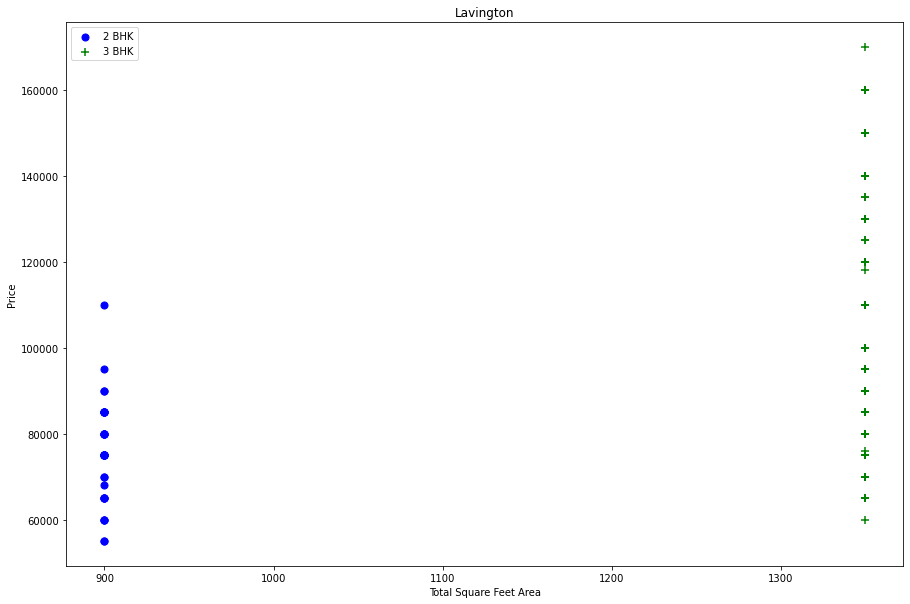

In [202]:
#next we can check instances where property prices for 2bedroom more than price for 3 bedroom
#we can visualize the data to identify such cases
def plot_scatter_chart(df,Region):
    bhk2 = df[(df.Region==Region) & (df.Bedrooms==2)]
    bhk3 = df[(df.Region==Region) & (df.Bedrooms==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(Region)
    plt.legend()
    

plot_scatter_chart(df7,'Lavington')

In [207]:
df7.head()

,sq_mtrs,Bedrooms,Bathrooms,Region,price,total_sqft,price_per_sqft
0,2.0,2.0,2.0,Brookside,65000.0,900.0,72.222222
1,2.0,2.0,2.0,Brookside,85000.0,900.0,94.444444
2,3.0,3.0,4.0,Brookside,85000.0,1350.0,62.962963
3,3.0,3.0,3.0,Brookside,85000.0,1350.0,62.962963
4,186.0,3.0,3.0,Brookside,90000.0,1350.0,66.666667


In [280]:
#We can remove such outliers/those 2BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1BHK appartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Region'):
        bhk_stats ={}
        for bhk,bhk_df in location_df.groupby('Bedrooms'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'sd':np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('Bedrooms'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(756, 7)

In [281]:
df8.shape

(756, 7)

In [214]:
df7.price.describe()

count      1563.000000
mean      96847.728727
std       38817.819999
min       13000.000000
25%       70000.000000
50%       90000.000000
75%      130000.000000
max      200000.000000
Name: price, dtype: float64

In [218]:
df7.sample(20)

,sq_mtrs,Bedrooms,Bathrooms,Region,price,total_sqft,price_per_sqft
1006,2.0,2.0,2.0,Rhapta Road,59000.0,900.0,65.555556
925,2160.0,3.0,4.0,Nyali Area,70000.0,1350.0,51.851852
78,3.0,3.0,3.0,General Mathenge,175000.0,1350.0,129.629630
90,2.0,2.0,2.0,Imara Daima,25000.0,900.0,27.777778
411,3.0,3.0,5.0,Kilimani,75000.0,1350.0,55.555556
1047,3.0,3.0,4.0,Rhapta Road,110000.0,1350.0,81.481481
1457,3.0,3.0,3.0,Westlands Area,150000.0,1350.0,111.111111
1325,4.0,4.0,3.0,Waiyaki Way,140000.0,1800.0,77.777778
279,196.0,3.0,4.0,Kileleshwa,120000.0,1350.0,88.888889
180,111.0,2.0,2.0,Kileleshwa,65000.0,900.0,72.222222


Text(0, 0.5, 'Count')

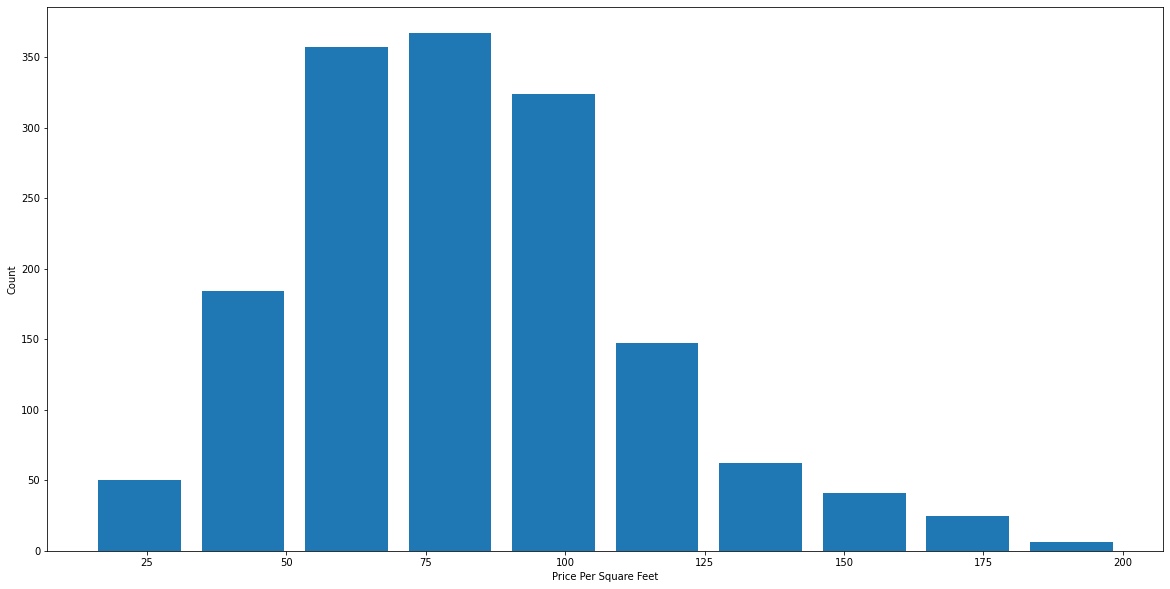

In [324]:
#we can now plot histogram to check the numbrt of aparrtments per square area
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
#shows that the data is normally distributed

In [225]:
df8.Bathrooms.unique()

array([2., 4., 3., 5., 1., 6.])

Text(0, 0.5, 'Count')

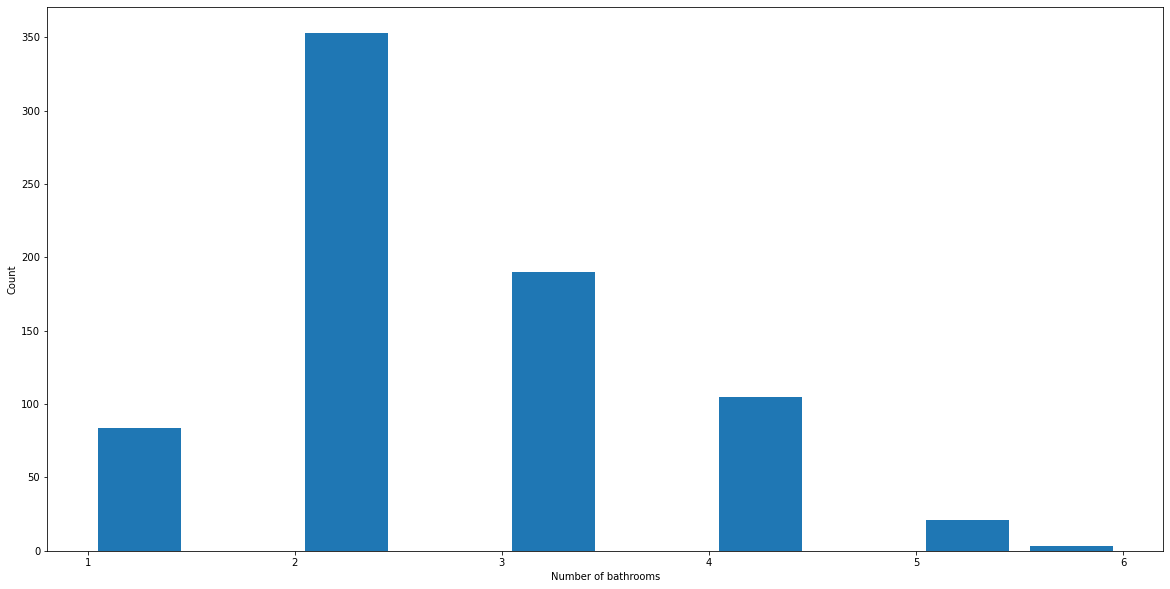

In [228]:
#we can plot an histogram of number of bathrooms
plt.hist(df8.Bathrooms,rwidth =0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')
#you notice most houses have 2 to 3 bathrooms with a few outliers

In [283]:
len(df8[df8.Bathrooms>df8.Bedrooms+1])

9

In [236]:
df7

,sq_mtrs,Bedrooms,Bathrooms,Region,price,total_sqft,price_per_sqft
0,2.0,2.0,2.0,Brookside,65000.0,900.0,72.222222
1,2.0,2.0,2.0,Brookside,85000.0,900.0,94.444444
2,3.0,3.0,4.0,Brookside,85000.0,1350.0,62.962963
3,3.0,3.0,3.0,Brookside,85000.0,1350.0,62.962963
4,186.0,3.0,3.0,Brookside,90000.0,1350.0,66.666667
...,...,...,...,...,...,...,...
1558,80.0,2.0,2.0,other,150000.0,900.0,166.666667
1559,90.0,2.0,2.0,other,150000.0,900.0,166.666667
1560,3.0,3.0,3.0,other,150000.0,1350.0,111.111111
1561,3.0,3.0,2.0,other,150000.0,1350.0,111.111111


In [325]:
#to drop the outliers
df9 = df7[df7.Bathrooms<df7.Bedrooms+1]
df9.shape

(1289, 7)

In [336]:
df10 = df7.drop(['sq_mtrs','price_per_sqft'], axis='columns')
df10.head(3)

,Bedrooms,Bathrooms,Region,price,total_sqft
0,2.0,2.0,Brookside,65000.0,900.0
1,2.0,2.0,Brookside,85000.0,900.0
2,3.0,4.0,Brookside,85000.0,1350.0


In [338]:
#first we realize our location colum is a text and we need to convert it to numeric. We can do that using one hor encoding technique.
dummies= pd.get_dummies(df10.Region)
dummies.head(3)

,Brookside,Dennis Pritt,General Mathenge,Hurlingham,Imara Daima,Kahawa West,Karen,Karura,Kasarani Area,Kiambu Road,...,Syokimau,Thigiri,Thika Road,Thindigua,Upper Hill,Valley Arcade,Waiyaki Way,Westlands Area,Ziwa La Ngombe,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [339]:
#we now join these dummies to our main dataframe and as normal rule for dummies, we drop one column in this case other column
df11 = pd.concat([df10,dummies.drop('other',axis='columns')], axis='columns')
df11.head(3)

,Bedrooms,Bathrooms,Region,price,total_sqft,Brookside,Dennis Pritt,General Mathenge,Hurlingham,Imara Daima,...,State House,Syokimau,Thigiri,Thika Road,Thindigua,Upper Hill,Valley Arcade,Waiyaki Way,Westlands Area,Ziwa La Ngombe
0,2.0,2.0,Brookside,65000.0,900.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2.0,Brookside,85000.0,900.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,4.0,Brookside,85000.0,1350.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [341]:
#we can now drop location column since we have created dummies out of it
df12 = df11.drop('Region',axis='columns')
df12.head(2)

,Bedrooms,Bathrooms,price,total_sqft,Brookside,Dennis Pritt,General Mathenge,Hurlingham,Imara Daima,Kahawa West,...,State House,Syokimau,Thigiri,Thika Road,Thindigua,Upper Hill,Valley Arcade,Waiyaki Way,Westlands Area,Ziwa La Ngombe
0,2.0,2.0,65000.0,900.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2.0,85000.0,900.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [343]:
df12.shape

(1563, 49)

In [344]:
#we now create our X and y variables
X = df12.drop('price', axis = 'columns')
X.head(2)

,Bedrooms,Bathrooms,total_sqft,Brookside,Dennis Pritt,General Mathenge,Hurlingham,Imara Daima,Kahawa West,Karen,...,State House,Syokimau,Thigiri,Thika Road,Thindigua,Upper Hill,Valley Arcade,Waiyaki Way,Westlands Area,Ziwa La Ngombe
0,2.0,2.0,900.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2.0,900.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [346]:
y = df12.price
y.head(2)

0    65000.0
1    85000.0
Name: price, dtype: float64

In [347]:
#we can now split our dataset for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=10)

In [350]:
#we can now create a linear model for the train dataset
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6496985192437689

In [351]:
#we can try a couple of models with different models to comeup with best model
#lets begin with k fold cross validation cv
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state =0)

cross_val_score(LinearRegression(),X,y, cv=cv)

array([0.59747105, 0.54355127, 0.5703715 , 0.59088314, 0.57970901])

In [352]:
#we can try different algorithms to see which one gives the best model using gridsearch cv
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclinic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)
#we can realize that the winner here is linear regression with best params being normalize and false

,model,best_score,best_params
0,linear_regression,0.576397,{'normalize': False}
1,lasso,0.576729,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.549905,"{'criterion': 'mse', 'splitter': 'random'}"


In [353]:
df10.sample(10)

,Bedrooms,Bathrooms,Region,price,total_sqft
529,3.0,3.0,Kilimani,95000.0,1350.0
734,3.0,3.0,Lavington,75000.0,1350.0
393,3.0,2.0,Kilimani,70000.0,1350.0
1282,1.0,1.0,Upper Hill,50000.0,450.0
9,3.0,3.0,Brookside,100000.0,1350.0
1317,2.0,2.0,Waiyaki Way,100000.0,900.0
363,2.0,1.0,Kilimani,60000.0,900.0
1076,3.0,3.0,Rhapta Road,160000.0,1350.0
131,3.0,3.0,Kiambu Road,55000.0,1350.0
908,3.0,2.0,Ngong Road,66000.0,1350.0


In [359]:
#we can confidently use the LinearRegression we trained earlier for our predictions.
#we can now write a property price prediction function basing from our model
def predict_price(Region,Bedrooms,Bathrooms,total_sqft):
    loc_index = np.where(X.columns==Region)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0] = Bedrooms
    x[1] =  Bathrooms
    x[2] = total_sqft
    if loc_index >=0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [362]:
#we can now predict price of different locations using the function above
predict_price('Rhapta Road',1,1,400)

60919.13081773637

In [363]:
#we can now export our model to a pickle file to be used by our python flask server
import pickle
with open('nairobi_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [364]:
#we also need to export the columns the way they appear in our data
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))